# Running a demo on training a pretrained

Going to try this wiht text prediction, and then use the pretrain to just choose numbers for acceleration, not sure if it will work, but it is in line with several papers

https://www.datacamp.com/tutorial/how-to-train-a-llm-with-pytorch

In [2]:
import torch
from trl import SFTTrainer
from datasets import load_dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments

In [3]:
train_dataset = load_dataset("tatsu-lab/alpaca", split="train")
print(train_dataset)

Generating train split: 52002 examples [00:00, 115721.30 examples/s]


Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 52002
})


In [7]:
train_dataset[9950]

{'instruction': 'Generate name ideas for a pet shop.',
 'input': '',
 'output': "1. Furry Friends Emporium\n2. Paws-itively Purrfect\n3. Critter Corner\n4. Zoomin' Pet Store \n5. Snuggle Safari \n6. Pawsibilities Unleashed\n7. Pet Paradise\n8. Tail Waggin' Outlet",
 'text': "Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nGenerate name ideas for a pet shop.\n\n### Response:\n1. Furry Friends Emporium\n2. Paws-itively Purrfect\n3. Critter Corner\n4. Zoomin' Pet Store \n5. Snuggle Safari \n6. Pawsibilities Unleashed\n7. Pet Paradise\n8. Tail Waggin' Outlet"}

In [8]:
pandas_format = train_dataset.to_pandas()
display(pandas_format.head())

,instruction,input,output,text
0,Give three tips for staying healthy.,,1.Eat a balanced diet and make sure to include...,Below is an instruction that describes a task....
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",Below is an instruction that describes a task....
2,Describe the structure of an atom.,,"An atom is made up of a nucleus, which contain...",Below is an instruction that describes a task....
3,How can we reduce air pollution?,,There are a number of ways to reduce air pollu...,Below is an instruction that describes a task....
4,Describe a time when you had to make a difficu...,,I had to make a difficult decision when I was ...,Below is an instruction that describes a task....


In [9]:
pretrained_model_name = "Salesforce/xgen-7b-8k-base"
model = AutoModelForCausalLM.from_pretrained(pretrained_model_name, torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name, trust_remote_code=True)

Loading checkpoint shards: 100%|██████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.03s/it]
A new version of the following files was downloaded from https://huggingface.co/Salesforce/xgen-7b-8k-base:
- tokenization_xgen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


In [10]:
model_training_args = TrainingArguments(
       output_dir="xgen-7b-8k-base-fine-tuned",
       per_device_train_batch_size=4,
       optim="adamw_torch",
       logging_steps=80,
       learning_rate=2e-4,
       warmup_ratio=0.1,
       lr_scheduler_type="linear",
       num_train_epochs=1,
       save_strategy="epoch"
   )

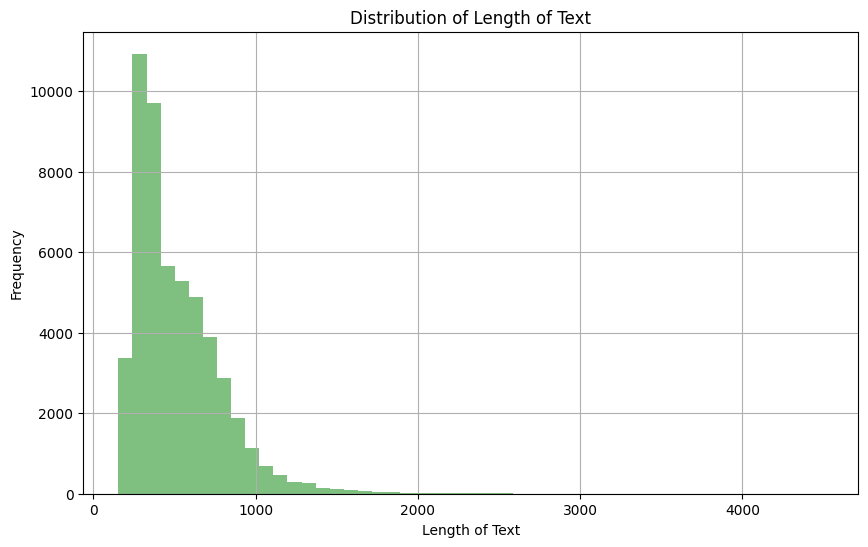

In [11]:
import matplotlib.pyplot as plt


pandas_format['text_length'] = pandas_format['text'].apply(len)


plt.figure(figsize=(10,6))
plt.hist(pandas_format['text_length'], bins=50, alpha=0.5, color='g')
plt.title('Distribution of Length of Text')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
SFT_trainer = SFTTrainer(
       model=model,
       train_dataset=train_dataset,
       dataset_text_field="text",
       max_seq_length=1024,
       tokenizer=tokenizer,
       args=model_training_args,
       packing=True,
       peft_config=lora_peft_config,
   )


NameError: name 'lora_peft_config' is not defined